In [2]:
import os
import pandas as pd
import numpy as np
from pandas.tseries import offsets

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
PATH_FOLDER = os.path.join(os.getcwd(), r"C:\Users\Lenovo\Desktop\Master Data Science - Nuclio Digital School\Projects\TimeSeries\Data")

merged = os.path.join(PATH_FOLDER, 'df_merged.csv')

df_merged = pd.read_csv(merged)
df_merged = df_merged.sample(2000000)
df_merged

,Unnamed: 0,id,item,category_x,department,store,store_code_x,region,d,date,weekday,weekday_int,category_y,store_code_y,yearweek,sell_price
28072828,28072828,ACCESORIES_1_391_NYC_2,ACCESORIES_1_391,ACCESORIES,ACCESORIES_1,Harlem,NYC_2,New York,d_1366,2014-10-25,Saturday,1,ACCESORIES,NYC_4,201537.0,5.1604
13437973,13437973,SUPERMARKET_3_092_NYC_2,SUPERMARKET_3_092,SUPERMARKET,SUPERMARKET_3,Harlem,NYC_2,New York,d_24,2011-02-21,Monday,3,SUPERMARKET,NYC_3,201503.0,4.6560
29428098,29428098,SUPERMARKET_3_551_NYC_2,SUPERMARKET_3_551,SUPERMARKET,SUPERMARKET_3,Harlem,NYC_2,New York,d_726,2013-01-23,Wednesday,5,SUPERMARKET,NYC_4,201338.0,5.6160
9647452,9647452,SUPERMARKET_3_367_BOS_2,SUPERMARKET_3_367,SUPERMARKET,SUPERMARKET_3,Roxbury,BOS_2,Boston,d_701,2012-12-29,Saturday,1,SUPERMARKET,NYC_1,201533.0,3.2160
19350057,19350057,SUPERMARKET_1_038_NYC_4,SUPERMARKET_1_038,SUPERMARKET,SUPERMARKET_1,Brooklyn,NYC_4,New York,d_1721,2015-10-15,Thursday,6,SUPERMARKET,NYC_3,201336.0,10.7760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11016568,11016568,SUPERMARKET_2_197_NYC_3,SUPERMARKET_2_197,SUPERMARKET,SUPERMARKET_2,Tribeca,NYC_3,New York,d_1669,2015-08-24,Monday,3,SUPERMARKET,BOS_2,201411.0,3.6000
27545779,27545779,SUPERMARKET_2_119_NYC_1,SUPERMARKET_2_119,SUPERMARKET,SUPERMARKET_2,Greenwich_Village,NYC_1,New York,d_666,2012-11-24,Saturday,1,SUPERMARKET,PHI_3,201500.0,3.2040
21566299,21566299,SUPERMARKET_3_380_NYC_1,SUPERMARKET_3_380,SUPERMARKET,SUPERMARKET_3,Greenwich_Village,NYC_1,New York,d_1148,2014-03-21,Friday,7,SUPERMARKET,BOS_3,201220.0,2.4960
8908680,8908680,SUPERMARKET_3_735_NYC_3,SUPERMARKET_3_735,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,d_898,2013-07-14,Sunday,2,SUPERMARKET,PHI_1,201601.0,2.4000


In [4]:
df_merged = df_merged.copy()
df_merged.columns

Index(['Unnamed: 0', 'id', 'item', 'category_x', 'department', 'store',
       'store_code_x', 'region', 'd', 'date', 'weekday', 'weekday_int',
       'category_y', 'store_code_y', 'yearweek', 'sell_price'],
      dtype='object')

In [5]:

df_merged = df_merged[['id', 'item', 'category_x', 'department', 'store',
       'store_code_x', 'region','date', 'weekday_int',
         'sell_price']]
df_merged.rename(columns={
    'id': 'item_store',
    'region': '1_region',
    'store': '2_store',
    'store_code_x': '3_sub_store',
    'category_x': '4_category',
    'department': '5_sub_category',
    'department': '6_item',
    
    

}, inplace=True)
df_merged

,item_store,item,4_category,6_item,2_store,3_sub_store,1_region,date,weekday_int,sell_price
28072828,ACCESORIES_1_391_NYC_2,ACCESORIES_1_391,ACCESORIES,ACCESORIES_1,Harlem,NYC_2,New York,2014-10-25,1,5.1604
13437973,SUPERMARKET_3_092_NYC_2,SUPERMARKET_3_092,SUPERMARKET,SUPERMARKET_3,Harlem,NYC_2,New York,2011-02-21,3,4.6560
29428098,SUPERMARKET_3_551_NYC_2,SUPERMARKET_3_551,SUPERMARKET,SUPERMARKET_3,Harlem,NYC_2,New York,2013-01-23,5,5.6160
9647452,SUPERMARKET_3_367_BOS_2,SUPERMARKET_3_367,SUPERMARKET,SUPERMARKET_3,Roxbury,BOS_2,Boston,2012-12-29,1,3.2160
19350057,SUPERMARKET_1_038_NYC_4,SUPERMARKET_1_038,SUPERMARKET,SUPERMARKET_1,Brooklyn,NYC_4,New York,2015-10-15,6,10.7760
...,...,...,...,...,...,...,...,...,...,...
11016568,SUPERMARKET_2_197_NYC_3,SUPERMARKET_2_197,SUPERMARKET,SUPERMARKET_2,Tribeca,NYC_3,New York,2015-08-24,3,3.6000
27545779,SUPERMARKET_2_119_NYC_1,SUPERMARKET_2_119,SUPERMARKET,SUPERMARKET_2,Greenwich_Village,NYC_1,New York,2012-11-24,1,3.2040
21566299,SUPERMARKET_3_380_NYC_1,SUPERMARKET_3_380,SUPERMARKET,SUPERMARKET_3,Greenwich_Village,NYC_1,New York,2014-03-21,7,2.4960
8908680,SUPERMARKET_3_735_NYC_3,SUPERMARKET_3_735,SUPERMARKET,SUPERMARKET_3,Tribeca,NYC_3,New York,2013-07-14,2,2.4000


In [6]:
df_merged.drop_duplicates(inplace=True)

def data_report(df):
    
    # Información general
    print("Información general:\n")
    print(df.info())
    print("\n")
    
    # Resumen estadístico
    print("Resumen estadístico:\n")
    print(df.describe())
    print("\n")
    
    # Valores nulos
    print("Valores nulos:\n")
    print(df.isnull().sum())
    print("\n")
    
    # Valores únicos
    print("Valores únicos:\n")
    for col in df.columns:
        print(col, ":", df[col].nunique())
    print("\n")
    
    # Valores repetidos
    print("Valores repetidos:\n")
    print(df.duplicated().sum())
    print("\n")
    
    # Distribución de valores categóricos
    print("Distribución de valores categóricos:\n")
    for col in df.select_dtypes(include=["object"]).columns:
        print(col, ":\n", df[col].value_counts(normalize=True), "\n")

data_report(df_merged)

Información general:

<class 'pandas.core.frame.DataFrame'>
Index: 605424 entries, 28072828 to 8908680
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   item_store   605424 non-null  object 
 1   item         605424 non-null  object 
 2   4_category   605424 non-null  object 
 3   6_item       605424 non-null  object 
 4   2_store      605424 non-null  object 
 5   3_sub_store  605424 non-null  object 
 6   1_region     605424 non-null  object 
 7   date         605424 non-null  object 
 8   weekday_int  605424 non-null  int64  
 9   sell_price   605424 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 50.8+ MB
None


Resumen estadístico:

         weekday_int     sell_price
count  605424.000000  605424.000000
mean        3.992339       5.541453
std         1.996121       4.507578
min         1.000000       0.012000
25%         2.000000       2.633400
50%         4.000000       4.176000
75% 

In [7]:
# df_merged.set_index('date', inplace=True)


In [8]:
df_merged.sort_index(inplace=True)

In [9]:
df_merged

,item_store,item,4_category,6_item,2_store,3_sub_store,1_region,date,weekday_int,sell_price
123,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.0880
125,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.3760
236,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.3760
243,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.0880
323,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2015-06-13,1,2.0880
...,...,...,...,...,...,...,...,...,...,...
29529019,HOME_&_GARDEN_1_047_BOS_1,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,South_End,BOS_1,Boston,2014-03-03,3,4.9625
29529021,HOME_&_GARDEN_1_047_BOS_1,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,South_End,BOS_1,Boston,2014-03-03,3,5.2875
29529138,HOME_&_GARDEN_1_047_PHI_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,2012-11-19,3,5.2875
29529207,HOME_&_GARDEN_1_047_BOS_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,2015-12-30,5,4.9625


In [10]:
df_merged['sales'] = 1
df_merged['revenue'] = df_merged['sales']*df_merged['sell_price']
df_merged['unique_days_sales'] = 1
df_merged['total_transactions'] = df_merged['sales']
df_merged

,item_store,item,4_category,6_item,2_store,3_sub_store,1_region,date,weekday_int,sell_price,sales,revenue,unique_days_sales,total_transactions
123,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.0880,1,2.0880,1,1
125,SUPERMARKET_3_235_BOS_1,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,South_End,BOS_1,Boston,2014-02-09,2,2.3760,1,2.3760,1,1
236,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.3760,1,2.3760,1,1
243,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2012-10-31,5,2.0880,1,2.0880,1,1
323,SUPERMARKET_3_235_PHI_2,SUPERMARKET_3_235,SUPERMARKET,SUPERMARKET_3,Yorktown,PHI_2,Philadelphia,2015-06-13,1,2.0880,1,2.0880,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29529019,HOME_&_GARDEN_1_047_BOS_1,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,South_End,BOS_1,Boston,2014-03-03,3,4.9625,1,4.9625,1,1
29529021,HOME_&_GARDEN_1_047_BOS_1,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,South_End,BOS_1,Boston,2014-03-03,3,5.2875,1,5.2875,1,1
29529138,HOME_&_GARDEN_1_047_PHI_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Yorktown,PHI_2,Philadelphia,2012-11-19,3,5.2875,1,5.2875,1,1
29529207,HOME_&_GARDEN_1_047_BOS_2,HOME_&_GARDEN_1_047,HOME_&_GARDEN,HOME_&_GARDEN_1,Roxbury,BOS_2,Boston,2015-12-30,5,4.9625,1,4.9625,1,1


In [11]:
df_merged['date'] = pd.to_datetime(df_merged['date'])
df_merged['date'].info()

<class 'pandas.core.series.Series'>
Index: 605424 entries, 123 to 29529236
Series name: date
Non-Null Count   Dtype         
--------------   -----         
605424 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 9.2 MB


In [12]:
df_agg = df_merged.set_index('date').groupby(["item_store", pd.Grouper(freq='M')]).agg(

    {
        'sales': np.sum,
        "revenue":np.sum,
        'total_transactions': np.sum,
        'unique_days_sales': np.sum

    }
).rename(
    columns = {

        "revenue":"Monthly_Revenue",
        "sales":"Monthly_Sales",
        'total_transactions': 'Monthly_Transactions',
        'unique_days_sales': 'Monthly_Days_Sales'

    }
).reset_index()


df_agg

,item_store,date,Monthly_Sales,Monthly_Revenue,Monthly_Transactions,Monthly_Days_Sales
0,ACCESORIES_1_001_BOS_1,2011-05-31,1,10.9858,1,1
1,ACCESORIES_1_001_BOS_1,2011-08-31,1,10.9858,1,1
2,ACCESORIES_1_001_BOS_1,2012-09-30,1,10.9858,1,1
3,ACCESORIES_1_001_BOS_1,2013-03-31,1,10.9858,1,1
4,ACCESORIES_1_001_BOS_1,2013-05-31,2,22.1312,2,2
...,...,...,...,...,...,...
275995,SUPERMARKET_3_827_PHI_3,2013-05-31,2,2.4000,2,2
275996,SUPERMARKET_3_827_PHI_3,2013-06-30,1,1.2000,1,1
275997,SUPERMARKET_3_827_PHI_3,2013-07-31,2,2.4000,2,2
275998,SUPERMARKET_3_827_PHI_3,2015-02-28,1,1.2000,1,1


In [13]:
df_agg.Monthly_Sales.value_counts()

Monthly_Sales
1     103032
2      87500
3      48211
4      20966
5       8151
6       4044
7       1851
8        984
9        573
10       286
11       182
12        84
13        53
14        31
15        15
17        10
16         9
18         5
19         5
21         3
20         3
25         2
Name: count, dtype: int64

In [14]:
df_merged['2_store'].value_counts()

2_store
Roxbury              62140
Midtown_Village      60906
Yorktown             60786
Tribeca              60753
Brooklyn             60438
Queen_Village        60250
South_End            60210
Back_Bay             60104
Greenwich_Village    59944
Harlem               59893
Name: count, dtype: int64

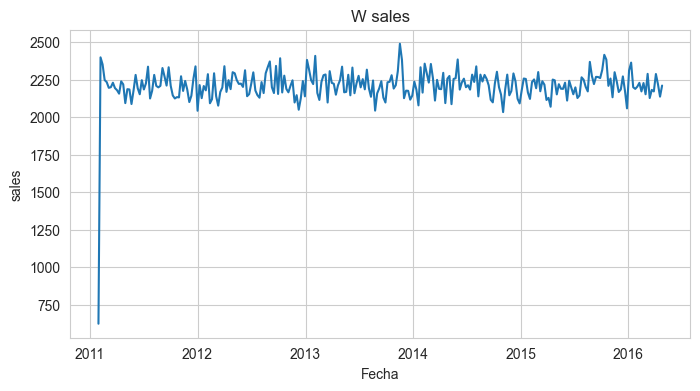

In [18]:
def plot_sales_by_granularity(df, datetime, variable):
    """
    Función que toma un dataframe con una columna de fecha, un objeto datetime y una variable
    y grafica los datos agrupados por la granularidad dada.
    """
    # Agrupar por la granularidad dada y sumar la variable
    data = df.set_index("date").resample(datetime)[variable].sum().reset_index()

    # Graficar los datos usando Seaborn
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.lineplot(x="date", y=variable, data=data)
    ax.set_title(datetime + ' ' + variable)
    ax.set_xlabel('Fecha')
    ax.set_ylabel(variable)
    plt.show()

plot_sales_by_granularity(df_merged, 'W', 'sales')